In [1]:
%pylab inline
from app.analysis import Quote
bonds = Quote.screen_funds('Bonds', 'Domestic', 'Government', 'Long-Term')
equities = Quote.screen_funds('Equities', 'Domestic', 'Large-Cap', 'Growth')
print(len(bonds), len(equities))
quote = Quote(bonds + equities + ['TMF', 'SPXL'], 126, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
6 16
from 2019-01-31 to 2019-07-31 - 24


In [2]:
stats = quote.statistics()
assert stats[stats['len'] < stats['len'].max()].empty
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False)

24


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
SPXL,122,0.245117,0.876226,0.270685,35.864167,19.502869
TMF,122,0.203637,0.729259,0.268355,27.602475,9.129596
MTUM,122,0.118688,0.269617,0.410774,15.558366,2.859384
VUG,122,0.118195,0.324669,0.339601,16.111723,8.023383
QQQ,122,0.117817,0.386418,0.284356,15.828936,10.983212
MGK,122,0.117238,0.332715,0.328514,15.811561,8.647441
VONG,122,0.112152,0.325443,0.320225,15.466916,7.928632
IWF,122,0.111898,0.324612,0.320264,15.378821,7.883790
IWY,122,0.110401,0.327545,0.312825,15.011753,8.194247


evicted MTUM 0.894 -0.221
retry backlogs ['MGK', 'TLT', 'IVW', 'IWY', 'QQQ', 'IEF', 'VOOG', 'JKE', 'IWF', 'SPYG', 'VONG', 'TMF', 'SPTL', 'EDV', 'VGLT', 'FV', 'ONEQ', 'SCHG', 'SPXL', 'RPG', 'IUSG'] at 0.905/-0.51 - 0.666
retry backlogs ['MGK', 'TLT', 'IVW', 'IWY', 'QQQ', 'IEF', 'VOOG', 'JKE', 'SPYG', 'IWF', 'VONG', 'SPTL', 'TMF', 'EDV', 'VGLT', 'FV', 'ONEQ', 'SCHG', 'SPXL', 'RPG', 'IUSG'] at 0.910/-0.52 - 0.666
retry backlogs ['MGK', 'TLT', 'IVW', 'IWY', 'QQQ', 'IEF', 'VOOG', 'JKE', 'SPYG', 'IWF', 'VONG', 'SPTL', 'TMF', 'EDV', 'VGLT', 'FV', 'ONEQ', 'SCHG', 'SPXL', 'RPG', 'IUSG'] at 0.915/-0.53 - 0.666
retry backlogs ['MGK', 'TLT', 'IVW', 'IWY', 'QQQ', 'IEF', 'VOOG', 'JKE', 'SPYG', 'IWF', 'VONG', 'SPTL', 'TMF', 'EDV', 'VGLT', 'FV', 'ONEQ', 'SCHG', 'SPXL', 'RPG', 'IUSG'] at 0.920/-0.54 - 0.666
retry backlogs ['MGK', 'TLT', 'IVW', 'IWY', 'QQQ', 'IEF', 'VOOG', 'JKE', 'SPYG', 'IWF', 'VONG', 'SPTL', 'TMF', 'EDV', 'VGLT', 'FV', 'ONEQ', 'SCHG', 'SPXL', 'RPG', 'IUSG'] at 0.925/-0.55 - 0.666
retr

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.067529,0.089390,-0.145466,0.007606,0.048938,0.124008,0.286834,0.666662,8.555294,0.733330
IEF,122.0,0.049459,0.115965,-0.248067,-0.028389,0.037421,0.120632,0.382150,0.358058,5.968865,1.474038
VUG,122.0,0.118195,0.324669,-0.953352,-0.058574,0.128858,0.303125,1.248317,0.339601,16.111723,8.023383


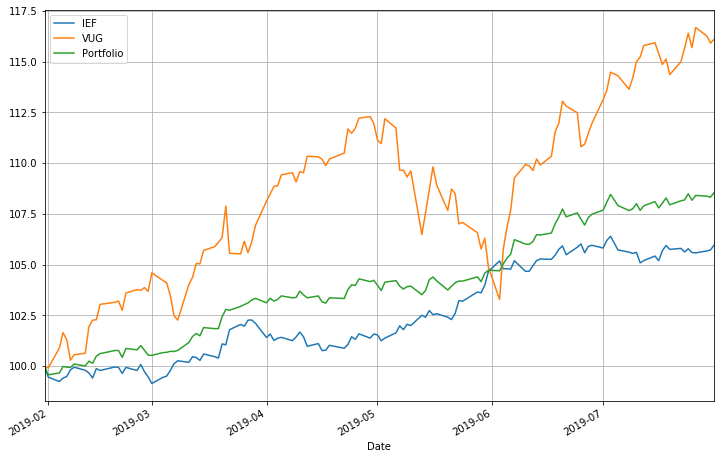

In [3]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio()
quote.setup_mask(['TLH', 'MTUM'])
sd.update(quote.optimize_portfolio())
quote.setup_mask(['SPTL', 'VONG'])
sd.update(quote.optimize_portfolio())
quote.setup_mask(['TMF', 'SPXL'])
sd.update(quote.optimize_portfolio())
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio())
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

In [ ]:
quote.setup_mask(['MTUM', 'TLH'])
quote.graph({'MTUM': 0.4, 'TLH': 0.6})

In [ ]:
quote.setup_mask(['SPTL', 'VONG'])
quote.graph({'SPTL': 0.57, 'VONG': 0.43})

In [ ]:
quote.setup_mask(['SPXL', 'TMF'])
quote.graph({'SPXL': 0.45, 'TMF': 0.55})